#TensorFlow versions in Colab


##Background
Colab has two versions of TensorFlow pre-installed: a 2.x version and a 1.x version. Colab uses TensorFlow 2.x by default, though you can switch to 1.x by the method shown below.


##Specifying the TensorFlow version

Running `import tensorflow` will import the default version (currently 2.x). You can use 1.x by running a cell with the `tensorflow_version` magic **before** you run `import tensorflow`.

If you want to switch TensorFlow versions after import, you **will need to restart your runtime** with 'Runtime' -> 'Restart runtime...' and then specify the version before you import it again.

In [22]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [23]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [24]:
print(train_images.shape[1:])


(28, 28)


In [25]:
%tensorflow_version 1.x

Once you have specified a version via this magic, you can run `import tensorflow` as normal and verify which version was imported as follows:

In [26]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [27]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [28]:
#scale data
train_data /=255.0
test_data /=255.0

In [29]:
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [30]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [31]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2660 - accuracy: 0.9178 - val_loss: 0.1376 - val_accuracy: 0.9565
Epoch 2/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0924 - accuracy: 0.9711 - val_loss: 0.0825 - val_accuracy: 0.9755
Epoch 3/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0581 - accuracy: 0.9818 - val_loss: 0.0854 - val_accuracy: 0.9732
Epoch 4/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0392 - accuracy: 0.9878 - val_loss: 0.0878 - val_accuracy: 0.9760
Epoch 5/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0759 - val_accuracy: 0.9786
Epoch 6/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0723 - val_accuracy: 0.9804
Epoch 7/10
60000/60000 [==============================] - 6s 1

**Ploting**

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None
10000/10000 [==============================] - 1s 79us/step
LOSS: 0.09071295164049441
ACCURACY: 0.9825000166893005


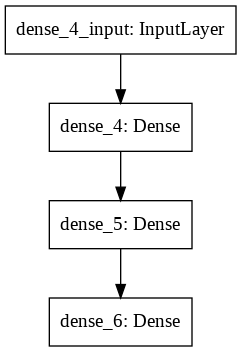

In [32]:
print(model.summary())
loss, accuracy = model.evaluate(test_data, test_labels_one_hot)
print("LOSS: {}".format(loss))
print("ACCURACY: {}".format(accuracy))

from keras.utils import plot_model
plot_model(model, to_file='model.png')

 **Plot for accuracy and loss**

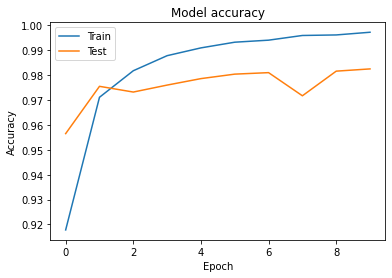

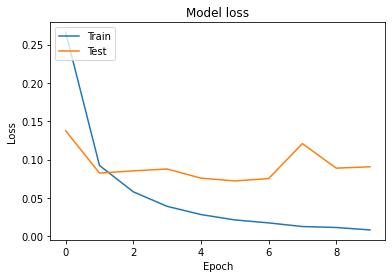

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.4067 - accuracy: 0.8763 - val_loss: 0.2775 - val_accuracy: 0.9101
Epoch 2/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.1555 - accuracy: 0.9522 - val_loss: 0.1457 - val_accuracy: 0.9550
Epoch 3/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0982 - accuracy: 0.9690 - val_loss: 0.0970 - val_accuracy: 0.9716
Epoch 4/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0673 - accuracy: 0.9788 - val_loss: 0.0955 - val_accuracy: 0.9697
Epoch 5/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0901 - val_accuracy: 0.9722
Epoch 6/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.1057 - val_accuracy: 0.9668
Epoch 7/10
60000/60000 [==============================] 

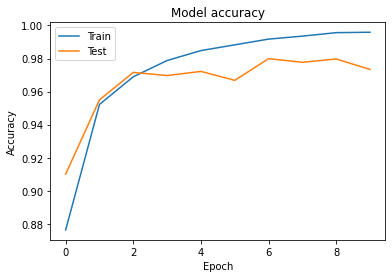

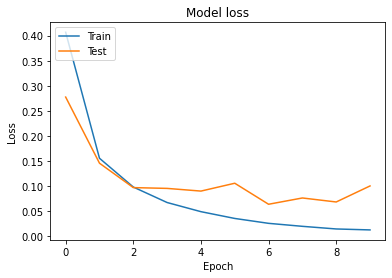

In [34]:
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
print(model.summary())
loss, accuracy = model.evaluate(test_data, test_labels_one_hot)
print("LOSS: {}".format(loss))
print("ACCURACY: {}".format(accuracy))

from keras.utils import plot_model
plot_model(model, to_file='model.png')

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()